The Dataset:

    The 2013 NBA combine statistics. This dataset contains the data of 62 participants in the 2013 NBA combine. The NBA combine is a combination if physical assessments used to measure the physical capabilities of each participant. This event is an invite only event in which the top prospects from around the world come to test their skills. The dataset is relatively small, containing only 62 entries and 19 columns. Because of this, we will use the dataet in its entirety. We will analyze this dataset to answer the following questions. The dataset can be accessed here: (https://github.com/achou11/NBA_draft_combine_measurements/blob/master/2013_nba_draft_combine.csv)

1. What is the mean wingspan of all centers from the 2013 NBA combine? 
2. Who were the top players drafted who participated in the 2013 NBA combine?
3. What is the mean vertical jump of guards from the 2013 NBA combine?
4. What is the difference between the means vertical jump of guards and centers from the 2013 NBA combine? 
5. Which player was the heaviest player drafted from the 2013 NBA combine? 
6. Which forward had the greatest wingspan from the 2013 NBA combine? 
7. Which drafted players have the smallest wingspan compared to their height?

Now that we have context and an understanding of the scope of the dataset, to answer the aforementioned questions, we will need to preform a brief analysis on the given data. The following is a recording of the steps I took to perform this analysis...

1. Import the data, along with all other relavent extensions required for data analysis

        The two required libaries needed for this analysis are Pandas and MatPlotLib. Pandas is used to import, clean, alter, and synthesize new datasets from the imported set. MatPlotLib will be used to create visualizations for the given analysis, in hopes to better understand what it means in the grand scope of things.

In [162]:
import pandas as pd
import matplotlib as plt
combine = pd.read_csv(r"C:\Users\egmat\Desktop\ds220\2013_nba_draft_combine.csv")


         Line 3, 'Combine = ....' imports and initializes the data into the variable, combine.

2. Generate an understanding of the data we are working with.

        This includes basic exploration of what the database looks like, what the data includes, etc.

In [163]:
combine.columns

Index(['Unnamed: 0', 'Player', 'Year', 'Draft pick', 'Height (No Shoes)',
       'Height (With Shoes)', 'Wingspan', 'Standing reach', 'Vertical (Max)',
       'Vertical (Max Reach)', 'Vertical (No Step)',
       'Vertical (No Step Reach)', 'Weight', 'Body Fat', 'Hand (Length)',
       'Hand (Width)', 'Bench', 'Agility', 'Sprint', 'Position'],
      dtype='object')

        Using 'dataset'.column returns each column name. With this, we can better understand the specific
        data we need to use for our analysis.

In [164]:
combine.head()

,Unnamed: 0,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint,Position
0,0,Adonis Thomas,2013,NaN,76.75,77.75,85.00,99.0,40.5,139.5,34.5,133.5,232,7.5,9.25,9.5,13.0,11.66,3.32,G
1,1,Allen Crabbe,2013,31.0,77.25,78.25,83.25,103.5,36.0,139.5,30.5,134.0,197,4.7,8.25,8.5,10.0,10.67,3.32,G
2,2,Andre Roberson,2013,26.0,78.25,79.00,83.00,104.5,36.5,141.0,30.0,134.5,206,7.1,8.75,9.5,10.0,11.36,3.34,F
3,3,Archie Goodwin,2013,29.0,75.75,77.25,81.50,102.0,36.0,138.0,30.0,132.0,189,4.6,8.50,9.0,1.0,10.75,3.27,G
4,4,B.J. Young,2013,NaN,74.25,75.50,80.25,99.0,NaN,NaN,NaN,NaN,179,4.7,8.50,9.5,NaN,NaN,NaN,G


        'dataset'.head() returns the top 5 data entries in the given dataset. This gives us an understanding
        of the actual data we will be working with

In [165]:
combine.tail()

,Unnamed: 0,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint,Position
57,57,Trevor Mbakwe,2013,NaN,78.75,80.00,88.00,106.5,36.5,143.0,30.0,136.5,236,5.9,9.50,11.50,21.0,12.01,3.32,F
58,58,Trey Burke,2013,9.0,71.75,73.25,77.50,97.5,36.5,134.0,29.5,127.0,187,6.9,8.25,8.75,3.0,11.20,3.16,G
59,59,Vander Blue,2013,NaN,75.50,77.25,78.00,100.5,37.5,138.0,28.0,128.5,197,4.6,8.50,9.50,4.0,10.40,3.14,G
60,60,Victor Oladipo,2013,2.0,75.25,76.25,81.25,100.5,42.0,142.5,33.0,133.5,213,6.6,8.75,9.25,15.0,10.69,3.25,G
61,61,Will Clyburn,2013,NaN,77.75,79.00,84.25,105.0,34.5,139.5,28.0,133.0,210,6.9,9.25,10.25,3.0,11.68,3.38,G


        Very similar to the command above, 'dataset'.tail() returns the bottom 5.

In [166]:
combine.shape

(62, 20)

        'dataset'.shape returns the number of rows and columns. This gives us an idea of the scope of data that we're dealing with.

2. Cleaning and preparing the data

        As mentioned prior and as seen by the combine.shape query, the size of our dataset is relatively small. This means that we want to keep the majority of the data aside from any rows with null values. We remove the null values as to perform analysis on the set as a whole, we need numerical values. Rows that lack these values provide our analysis with no value so they should be removed.


In [167]:
combine.isnull().sum()

Unnamed: 0                   0
Player                       0
Year                         0
Draft pick                  18
Height (No Shoes)            0
Height (With Shoes)          0
Wingspan                     0
Standing reach               0
Vertical (Max)              11
Vertical (Max Reach)        11
Vertical (No Step)          11
Vertical (No Step Reach)    11
Weight                       0
Body Fat                     0
Hand (Length)                0
Hand (Width)                 0
Bench                       10
Agility                     11
Sprint                      11
Position                     0
dtype: int64

        To check for null values we first use the line, 'dataset'.isnull, which returns a boolean of true or false for every cell depending on whether the value is null or not. The .sum() combines each boolean for each column, returning what is seen above. 

In [168]:
combine.duplicated().sum()

0

        'dataset'.duplocated() work very similarly but instead of checking the individual cells, it checks each row. We see that our dataset has no duplicates so no rows have to be removed.

In [169]:
cleandcombine = combine.dropna(how='any', subset=['Vertical (Max)', 'Vertical (Max Reach)', 'Vertical (No Step)', 'Vertical (No Step Reach)', 'Bench', 'Agility', 'Sprint']).drop('Unnamed: 0', axis=1)

        We then remove all the data attatched to each row that has a null value, intializing the cleaned data as cleanedcombine, as well as removed the 'unnamed: 0' column, as it has no relavence to our analysis.

In [170]:
drafted = cleandcombine.loc[(cleandcombine['Draft pick'] > 0)]
drafted = drafted.sort_values('Draft pick')
drafted


,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint,Position
60,Victor Oladipo,2013,2.0,75.25,76.25,81.25,100.5,42.0,142.5,33.0,133.5,213,6.6,8.75,9.25,15.0,10.69,3.25,G
38,Otto Porter,2013,3.0,79.50,80.50,85.50,105.5,36.0,141.5,27.0,132.5,198,6.7,8.75,9.25,9.0,11.25,3.40,F
11,Cody Zeller,2013,4.0,82.75,84.25,82.75,106.0,37.5,143.5,35.5,141.5,230,4.8,8.50,10.50,17.0,10.82,3.15,C
5,Ben McLemore,2013,7.0,75.50,76.75,79.75,100.5,42.0,142.5,32.5,133.0,189,5.0,8.75,9.50,6.0,11.87,3.27,G
29,Kentavious Caldwell-Pope,2013,8.0,76.50,77.50,80.00,100.5,34.5,135.0,29.0,129.5,204,6.5,8.50,9.00,7.0,10.60,3.12,G
58,Trey Burke,2013,9.0,71.75,73.25,77.50,97.5,36.5,134.0,29.5,127.0,187,6.9,8.25,8.75,3.0,11.20,3.16,G
9,C.J. McCollum,2013,10.0,74.25,75.25,78.25,96.5,38.5,135.0,32.0,128.5,197,8.6,8.00,9.50,13.0,11.02,3.32,G
32,Michael Carter-Williams,2013,11.0,76.75,77.75,79.25,101.0,41.0,142.0,31.5,132.5,184,4.4,7.50,8.50,8.0,10.68,3.22,G
53,Steven Adams,2013,12.0,82.75,84.00,88.50,109.5,33.0,142.5,28.5,138.0,255,6.7,9.50,11.00,16.0,11.85,3.40,C
27,Kelly Olynyk,2013,13.0,82.75,84.00,81.75,108.0,29.5,137.5,24.5,132.5,234,6.7,8.50,10.00,5.0,11.42,3.59,F


        A few of our problem questions require analyzing participants from the combine who were drafted. Because of this, I needed to select the subset of data that applies. In the prior code chunk, I used the loc function to select all players who had a numbered draft pick. I then sort the data based on descending order of draft pick.

In [171]:
cleandcombine = cleandcombine.sort_values('Player')

        My next step for cleaning and preparing the data was sorting the cleanedcombine variable by player name so it was better organized.

In [172]:
centers = cleandcombine.loc[cleandcombine['Position'] == 'C']
fowards = cleandcombine.loc[cleandcombine['Position'] == 'F']
guards = cleandcombine.loc[cleandcombine['Position'] == 'G']

        Similarly to the code chuck prior to the one above, I initialized 3 new variables, one for each position, as a few of the questions about the dataset deal with each position in basketball. This will make the actual analysis easier and this is the final step in preparing out data.

3. Beginning our analysis

        Now that our data is prepped and cleaned we can begin to answer the questions posed in the beginning. Our first question was, 
        "What is the mean wingspan of all centers from the 2013 NBA combine?"

        This is answered by using the mean() function on the wingspan column of our centers dataset, the dataset that contains only centers. This can be seen by the following code chunk..

In [173]:
centers['Wingspan'].mean()

86.53571428571429

        Centers is the dataset were using, ['wingspan'] specifices the wingspan column, and finally .mean() finds the combined mean of every entry in the wingspan column. We see that the average wingspan by a center is around 86.5 inches.

        Next I plot the data in a bar graph, where the x-axis is the players names and the y-axis is the wingspan height. The horizontal blue line is the mean of the wingspans.

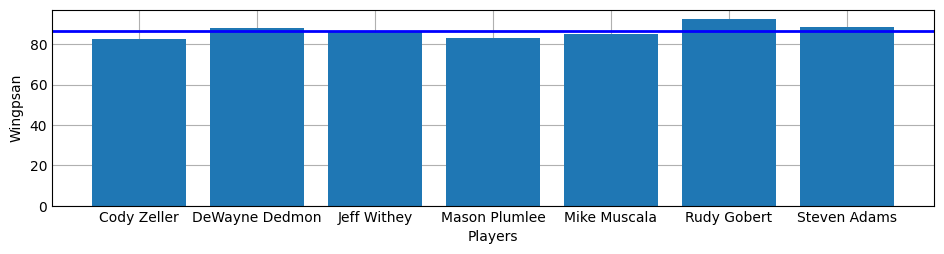

In [174]:

centerwingspans = centers.loc[:, ['Wingspan']]
centerplayers = centers.loc[:, ['Player']]

import matplotlib.pyplot as plt
import numpy as np

x = centerplayers['Player']
y = centerwingspans['Wingspan']

fig = plt.figure(figsize=(9, 2))
ax = fig.add_subplot(111)
ax.axhline(y.mean(), color='blue', linewidth=2)


plt.bar(x, y)
plt.xlabel('Players')
plt.ylabel('Wingpsan')
plt.show()

        Our next question is, 'Who were the top players drafted who participated in the 2013 NBA combine?'. As seen in the beginning of this analysis, the .head() function can be used to return the top 5 entries in a given dataframe. We can easily answer this question using this and the drafted dataset.

In [175]:
drafted.head()

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint,Position
60,Victor Oladipo,2013,2.0,75.25,76.25,81.25,100.5,42.0,142.5,33.0,133.5,213,6.6,8.75,9.25,15.0,10.69,3.25,G
38,Otto Porter,2013,3.0,79.50,80.50,85.50,105.5,36.0,141.5,27.0,132.5,198,6.7,8.75,9.25,9.0,11.25,3.40,F
11,Cody Zeller,2013,4.0,82.75,84.25,82.75,106.0,37.5,143.5,35.5,141.5,230,4.8,8.50,10.50,17.0,10.82,3.15,C
5,Ben McLemore,2013,7.0,75.50,76.75,79.75,100.5,42.0,142.5,32.5,133.0,189,5.0,8.75,9.50,6.0,11.87,3.27,G
29,Kentavious Caldwell-Pope,2013,8.0,76.50,77.50,80.00,100.5,34.5,135.0,29.0,129.5,204,6.5,8.50,9.00,7.0,10.60,3.12,G


        The third question is, 'What is the mean vertical jump of guards from the 2013 NBA combine?'. For this question, we can use a similar methodology to the first question. Using the guards dataset, we select the max vertical column and find the mean of the values in that column. I also did the same for the centers dataset as it will be important for the next question. We see that the average max vertical jump for a guard is around 33 inches.

In [176]:
guardvert = guards['Vertical (Max)'].mean()
centervert = centers['Vertical (Max)'].mean()
guardvert

38.104166666666664

        The fourth question is, 'What is the difference between the means vertical jump of guards and centers from the 2013 NBA combine?' Using the centervert variable initialized in the code chunk prior, we just take the difference between the two. We see that on average, guards can jump around 5 inches higher than centers can.

In [177]:
guardvert-centervert

5.175595238095234

    The fifth question is 'Which player was the heaviest player drafted from the 2013 NBA combine?'. Using the previously created drafted dataset, we use the loc function to find the player whos weight is equal to the maximum weight. This yield a player named Steven Adams, a center.

In [178]:
drafted.loc[(drafted['Weight'] == drafted['Weight'].max())]

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint,Position
53,Steven Adams,2013,12.0,82.75,84.0,88.5,109.5,33.0,142.5,28.5,138.0,255,6.7,9.5,11.0,16.0,11.85,3.4,C


        Our 6th question is 'Which forward had the greatest wingspan from the 2013 NBA combine?'. The methodology is nearly identical to that of the question above, but instead of using the drafted dataset, we use the foward dataset and use the loc function to return the foward with the largest wingspan. This returns a player named Trevor Mbakwe.

In [179]:
fowards.loc[(fowards['Wingspan'] == fowards['Wingspan'].max())]

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint,Position
57,Trevor Mbakwe,2013,NaN,78.75,80.0,88.0,106.5,36.5,143.0,30.0,136.5,236,5.9,9.5,11.5,21.0,12.01,3.32,F


        Our final question is, 'Which drafted players have the smallest wingspan compared to their height?'. To answer this question, I added a new column to the dataset using a ratio of the players wingspan to their height. I then used a methodology similiar to the last two questions to return the player with the smallest ratio of wingspan to height. It returned a player named kelly Olynyk.

In [180]:
drafted['Wingspan to Height'] = drafted['Wingspan']/drafted['Height (No Shoes)']
drafted.loc[(drafted['Wingspan to Height'] == drafted['Wingspan to Height'].min())]

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint,Position,Wingspan to Height
27,Kelly Olynyk,2013,13.0,82.75,84.0,81.75,108.0,29.5,137.5,24.5,132.5,234,6.7,8.5,10.0,5.0,11.42,3.59,F,0.987915


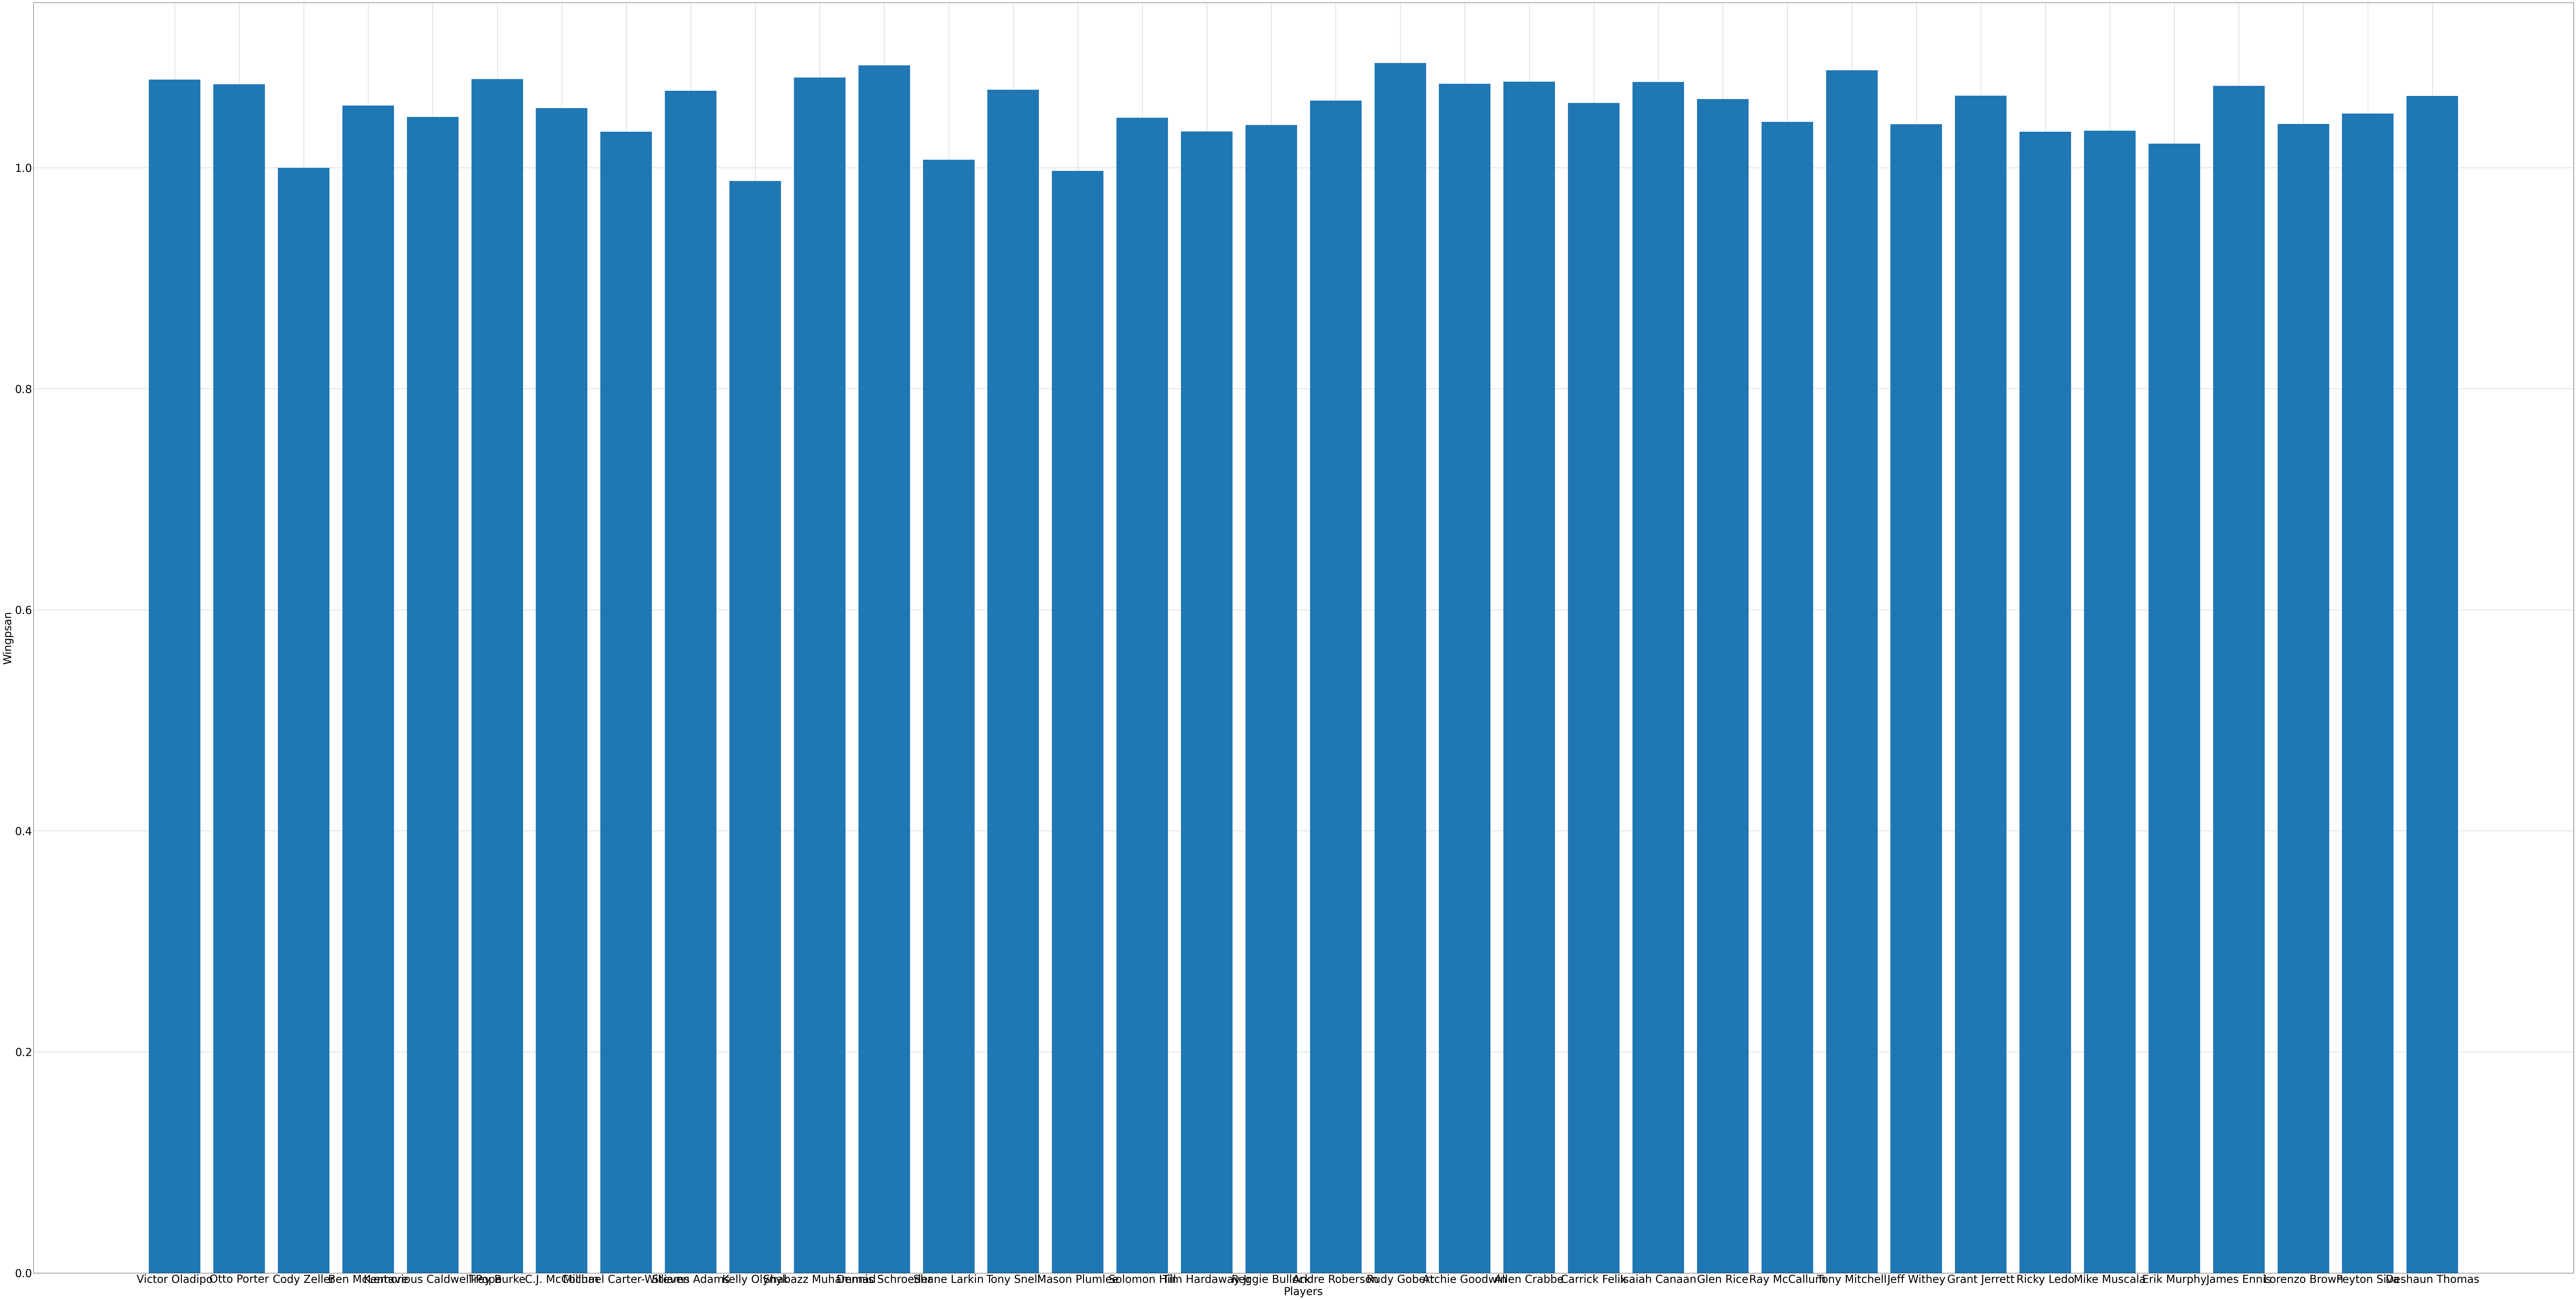

In [200]:


import matplotlib.pyplot as plt
import numpy as np

x = drafted['Player']
y = drafted['Wingspan to Height']

fig = plt.figure(figsize=(100, 50))
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 30})


plt.bar(x, y)
plt.xlabel('Players')
plt.ylabel('Wingpsan')
plt.show()

        This is a visualization for the Wingspan to Height ratios, with the Wingspan to Height being the y axis and the players being the x. Its harder to see the player names as there were so many data entries.

Conclusion:

        We have finally completed all of the initially proposed questions and finished out data analysis. Our dataset was relatively small and inconsequential in comparison to other datasets which may have a greater globle or cultural impact, but through the use of data analytics many patterns can be discovered. Though what we did only skimmed the surface, analytics of datasets like ours can help create a bigger picture. Whether it's a NBA Team GM trying to find which player they should draft next, or an up and coming player figuring out what skills matter the most, data analyitics can always be helpful.